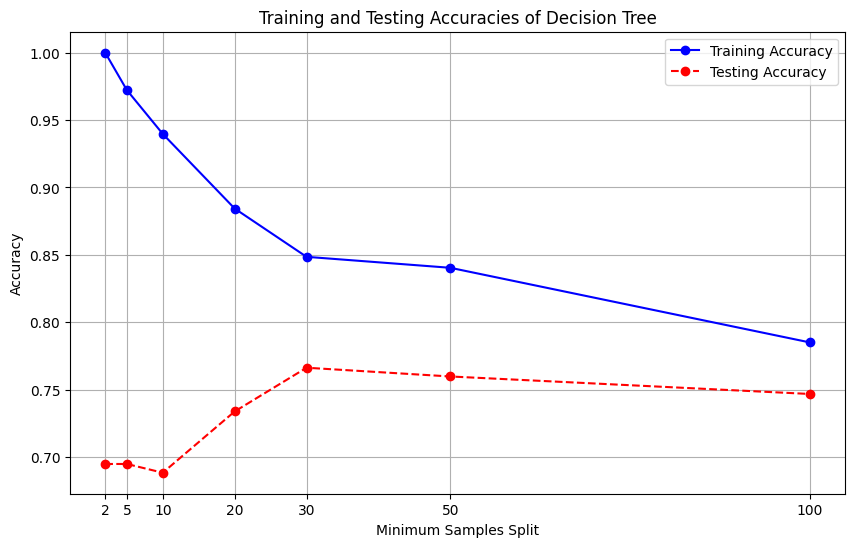

In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

X = df.drop('Outcome', axis=1)
y = df['Outcome']

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

train_accuracies = []
test_accuracies = []
n_runs = 10
for min_samples_split in min_samples_splits:
    train_acc_run = []
    test_acc_run = []
    
    for _ in range(n_runs):
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        
        train_acc_run.append(accuracy_score(y_train, y_train_pred))
        test_acc_run.append(accuracy_score(y_test, y_test_pred))
    
    train_accuracies.append(np.mean(train_acc_run))
    test_accuracies.append(np.mean(test_acc_run))

plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, marker='o', linestyle='--', color='red', label='Testing Accuracy')
plt.title('Training and Testing Accuracies of Decision Tree')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_splits)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset from the ARFF file
data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data)

# Convert byte strings to regular strings in the class column
df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

# Separate the features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Set the minimum sample split values to be tested
min_samples_splits = [2, 5, 10, 20, 30, 50, 100]

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Split the dataset into stratified 80-20 training-testing sets with a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Perform 10 runs to average out the randomness in the split thresholding (optional)
n_runs = 10
for min_samples_split in min_samples_splits:
    train_acc_run = []
    test_acc_run = []
    
    for _ in range(n_runs):
        # Split the dataset into stratified 80-20 training-testing sets with a fixed random state
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
        
        # Create and train the Decision Tree classifier
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
        clf.fit(X_train, y_train)
        
        # Calculate training accuracy
        y_train_pred = clf.predict(X_train)
        train_acc = accuracy_score(y_train, y_train_pred)
        train_acc_run.append(train_acc)
        
        # Calculate testing accuracy
        y_test_pred = clf.predict(X_test)
        test_acc = accuracy_score(y_test, y_test_pred)
        test_acc_run.append(test_acc)
    
    # Average the accuracies over the runs
    train_accuracies.append(np.mean(train_acc_run))
    test_accuracies.append(np.mean(test_acc_run))

# Plotting the training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(min_samples_splits, test_accuracies, marker='o', linestyle='--', color='red', label='Testing Accuracy')
plt.title('Training and Testing Accuracies of Decision Tree')
plt.xlabel('Minimum Samples Split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_splits)
plt.grid(True)
plt.legend()
plt.show()
